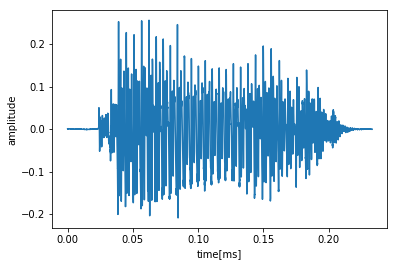

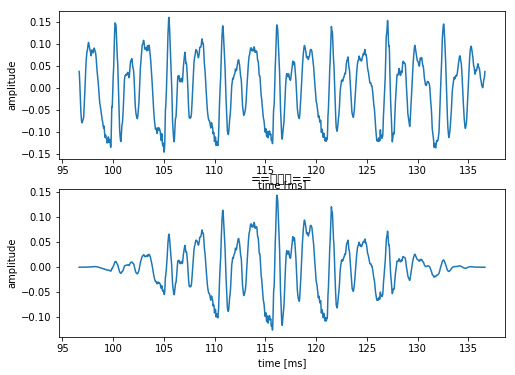

==通常スペクトル==


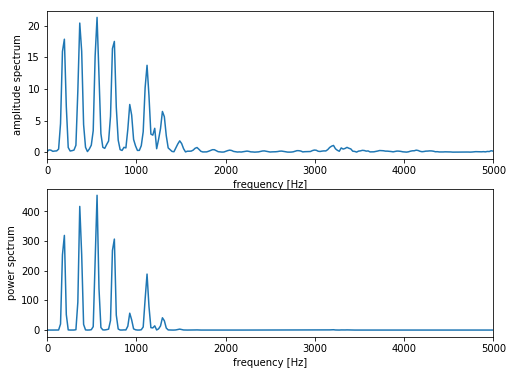

==対数スペクトラム==


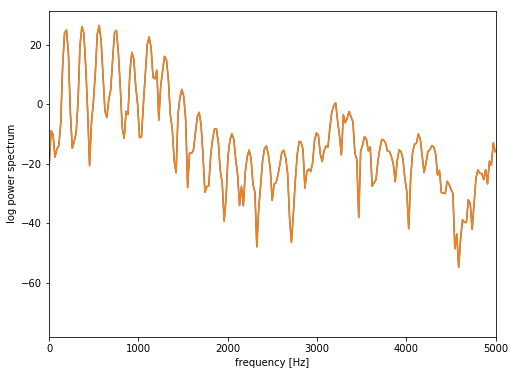

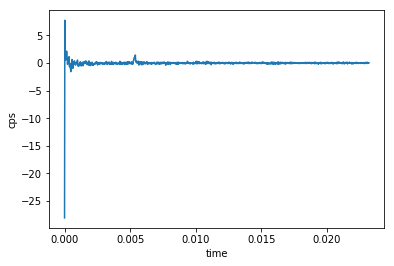

D:\python\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


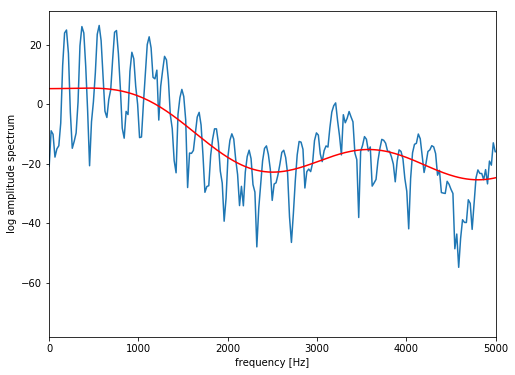

In [9]:
#music2capstram
import wave
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def waveread(fname):
    wf=wave.open(fname,'r')
    fs=wf.getframerate()
    x=wf.readframes(wf.getnframes())
    x=np.frombuffer(x,dtype='int16')/32780.0
    wf.close()
    
    return x,float(fs)

wav,fs=waveread('a.wav')
time=np.arange(0,len(wav)/fs,1/fs)
plt.figure(figsize=(6,4))
plt.plot(time,wav)
plt.xlabel('time[ms]')
plt.ylabel('amplitude')
plt.show()


#母音の定常部分を抽出
center=int(len(wav)/2)
cuttime=0.04

wavdata=wav[int(center-cuttime/2*fs):int(center+cuttime/2*fs)]
#音声データに合わせて時間幅も変化
time=time[int(center-cuttime/2*fs):int(center+cuttime/2*fs)]

plt.figure(figsize=(8,6))
plt.title('==母音定常部分スペクトル==')
plt.subplot(2,1,1)
plt.plot(time*1000,wavdata)
plt.xlabel('time [ms]')
plt.ylabel('amplitude')

hanningwindow=np.hanning(len(wavdata))
wavdata=hanningwindow*wavdata


plt.subplot(2,1,2)
plt.plot(time*1000,wavdata)
plt.title('==窓関数==')
plt.xlabel('time [ms]')
plt.ylabel('amplitude')

plt.show()


#窓関数をかけた波形にフーリエ変換を施す　ここではタダノスペクトル
n=2048
dft=np.fft.fft(wavdata,n)
#振幅スペクトル
Adft=np.abs(dft)
#パワースペクトル
Pdft=np.abs(dft)**2
#周波数スケール
fscale=np.fft.fftfreq(n,d=1/fs)


plt.figure(figsize=(8,6))
print('==通常スペクトル==')
plt.subplot(2,1,1)
plt.plot(fscale[0:int(n/2)],Adft[0:int(n/2)])
plt.xlabel('frequency [Hz]')
plt.ylabel('amplitude spectrum')
plt.xlim(0,5000)

plt.subplot(2,1,2)
plt.plot(fscale[0:int(n/2)],Pdft[0:int(n/2)])
plt.xlabel('frequency [Hz]')
plt.ylabel('power spctrum')
plt.xlim(0,5000)

plt.show()

#音楽の対数スペクトラム
Adftlog=20*np.log10(Adft)
Pdftlog=10*np.log10(Pdft)

plt.figure(figsize=(8,6))
print('==対数スペクトラム==')
plt.plot(fscale[0:int(n/2)],Adftlog[0:int(n/2)])
plt.xlabel('frequency [Hz]')
plt.ylabel('log amplitude spectrum')
plt.xlim(0,5000)

plt.plot(fscale[0:int(n/2)],Pdftlog[0:int(n/2)])
plt.xlabel('frequency [Hz]')
plt.ylabel('log power spectrum')
plt.xlim(0,5000)
plt.show()

#ケプストラム
cps=np.real(np.fft.ifft(Adftlog))
quefrency=time-min(time)

plt.figure(figsize=(6,4))
plt.plot(quefrency[0:int(n/2)],cps[0:int(n/2)])
plt.xlabel('time')
plt.ylabel('cps')
plt.show()

#ローパスリフター
cepcoef=20
cpslif=np.array(cps)
#高周波成分を除く操作
cpslif[cepcoef:len(cpslif)-cepcoef+1]=0

#ケプストラム領域をフーリエ変換してスペクトラム領域へ
dftcps=np.fft.fft(cpslif,n)

#original spectrum
plt.figure(figsize=(8,6))
plt.plot(fscale[0:int(n/2)],Adftlog[0:int(n/2)])

#高周波成分を除いたグラフをプロット
plt.plot(fscale[0:int(n/2)],dftcps[0:int(n/2)],c='red')
plt.xlabel('frequency [Hz]')
plt.ylabel('log amplitude spectrum')
plt.xlim(0,5000)
plt.show()





In [29]:
import librosa,librosa.display
import matplotlib.pyplot as plt
import wave
import numpy as np

44100
(1030144,)
(128, 2013)


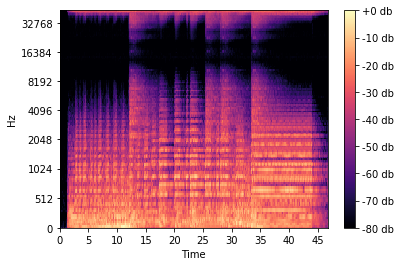

In [32]:
wf=wave.open('fanfare.wav','r')
fs=wf.getframerate()
data=wf.readframes(wf.getnframes())
data=np.frombuffer(data,dtype='int16')/32780.0
wf.close()
print(fs)
print(data.shape)
#メル周波数ケプストラム
melspecs=librosa.feature.melspectrogram(y=data,sr=fs,n_fft=2048,n_mels=128)
print(melspecs.shape)

#可視化
librosa.display.specshow(librosa.power_to_db(melspecs,ref=np.max),
                        x_axis='time',y_axis='mel',fmax=fs)

plt.colorbar(format='%+2.0f db')
plt.show()

In [33]:
#train 多層CNN
#畳み込み層1 n_input_channels=1,kernel_size,stride,padding,n_output_channels
#n_output_channels=n_input_channels
#畳み込み層＞プーリング層＞畳み込み層＞プーリング層＞畳み込み層＞・・・＞平坦化＞全結合層>全結合層（線形活性化）

In [34]:
"""全体像フレーム　buil_cnn
   h1:tf_x,n_input_channels=1,n_output_channels=16,ksize=(6,6),padding='VALID'
   h1_pool:h1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME',max_pool
   h2:h1_pool,n_input_channels=16,n_output_channels=32,ksize=(6,6),padding='VALID'
   h2_pool:h2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME,max_pool
   h3:h2_pool,n_input_channels=32,n_output_channels=64,ksize=(4,4),padding='VALID'
   h3_pool:h3,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME',max_pool
   h4:fc_layer,h3_pool,n_output_units=4096,activation_fn=relu
   dropout:keepprob,h4_dropout
   h5:n_output_units=8,activation_fn:None
   
   predictions={'probabilities':softmax,'labels'}
   
   損失関数と最適化
   cost=softmax_cross_entropy_with_logitsの平均
   optimizer:Adamoptimizer,train_op
   
   correct_predictions
   accuracy
   
   train,predict,init:学習モデル、予測、初期化、初期パラメータの設定
   save,load:学習モデルの保存と呼び出し
   ＋バッチ学習も出来るようにしておく"""

"全体像フレーム\u3000buil_cnn\n   h1:tf_x,n_input_channels=1,n_output_channels=16,ksize=[1,6,6,1],padding='VALID'\n   h1_pool:h1,ksize=[1,2,2,1],stride=[1,2,2,1],padding='SAME',max_pool\n   h2:h1_pool,n_input_channels=16,n_output_channels=32,ksize=[1,6,6,1],padding='VALID'\n   h2_pool:h2,ksize=[1,2,2,1],stride=[1,2,2,1],padding='SAME,max_pool\n   h3:h2_pool,n_input_channels=32,n_output_channels=64,ksize=[1,4,4,1],padding='VALID'\n   h3_pool:h3,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME',max_pool\n   h4:fc_layerhe_pool,n_output_units=4096,activation_fn=relu\n   dropout:keepprob,h4_dropout\n   h5:n_output_units=8,activation_fn:None\n   \n   predictions={'probabilities':softmax,'labels'}\n   \n   損失関数と最適化\n   cost=softmax_cross_entropy_with_logitsの平均\n   optimizer:Adamoptimizer,train_op\n   \n   correct_predictions\n   accuracy\n   \n   train,predict,init:学習モデル、予測、初期化、初期パラメータの設定\n   save,load:学習モデルの保存と呼び出し\n   ＋バッチ学習も出来るようにしておく"